In [11]:
import sys, os
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')
# Importing GemPy
import gempy as gp
import matplotlib.pyplot as plt

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

In [12]:
theano_optimizer = 'fast_compile'

In [13]:
data_path=r'inputdata/'

In [14]:
change_color=False
extent = [0,1000,0,1000,0,1000]

In [15]:
all_models = ['Horizontal_layers', 'Recumbent_fold', 'Anticline',
         'Pinchout', 'Fault', 'Unconformity']

### Horizontal Stratigraphic layers

In [31]:
def create_example_model(name, extent = [0,1000,0,1000,0,1000], change_color=False, data_path=r'inputdata/'):
    
    all_models = ['Horizontal_layers', 'Recumbent_fold', 'Anticline',
             'Pinchout', 'Fault', 'Unconformity']
    
    assert name in all_models, 'possible model names are '+ str(all_models)
    geo_model = gp.create_model(name)
    
    if name == 'Horizontal_layers':
        geo_model = gp.create_data(extent=extent,#resolution=[5,5,5], 
                                path_o = data_path+"model1_orientations.csv",
                                path_i = data_path+"model1_surface_points.csv")
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#9f0052', 'rock1': '#e36746', 
                                                 'basement': '#f9f871'})

        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
    
    elif name == 'Recumbent_fold':
        geo_model = gp.create_data(extent=extent, 
                        path_o = data_path + "model3_orientations.csv",
                        path_i = data_path + "model3_surface_points.csv") 
        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#e36746', 'rock1': '#c0539f', 
                                                 'basement': '#006fa8'})
            
    elif name == 'Anticline':
        geo_model = gp.create_data(extent=extent, 
                                  path_o = data_path + "model2_orientations.csv",
                                  path_i = data_path + "model2_surface_points.csv")
        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        
    elif name == 'Pinchout':
        geo_model = gp.create_data(extent=extent,
                                path_o = data_path + "model4_orientations.csv",
                                path_i = data_path + "model4_surface_points.csv")
        gp.map_series_to_surfaces(geo_model, {"Strat_Series": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#a1b455', 'rock1': '#ffbe00', 
                                                 'basement': '#006471'})
            
    elif name == 'Fault':
        geo_model = gp.create_data(extent=extent,
                                path_o = data_path + "model5_orientations.csv",
                                path_i = data_path + "model5_surface_points.csv") 
        gp.map_series_to_surfaces(geo_model, {"Fault_Series":'fault', 
                                 "Strat_Series": ('rock2','rock1')})
        geo_model.set_is_fault(['Fault_Series'], change_color=False)
        if change_color:
            geo_model.surfaces.colors.change_colors({"rock2": '#00c2d0', 'rock1': '#a43d00', 
                                                 'basement': '#76a237', 'fault':'#000000'})
            
    elif name == 'Unconformity':
        geo_model = gp.create_data(extent=extent, 
                                path_o = data_path + "model6_orientations.csv",
                                path_i = data_path + "model6_surface_points.csv")
        
        gp.map_series_to_surfaces(geo_model, {"Strat_Series1": ('rock3'),
                                             "Strat_Series2": ('rock2','rock1'),
                                             "Basement_Series":('basement')})
        
    # das kann auch weg theoretisch
    geo_model.grid.set_section_grid({'section'+' '+name:([0,500],[1000,500],[30,30])})

    interp_data = gp.set_interpolation_data(geo_model, compile_theano=True,
                                        theano_optimizer=theano_optimizer)

    _=gp.compute_model(geo_model, compute_mesh=False)
    
    # kann auch weg
    gp.plot.plot_section_by_name(geo_model,'section'+' '+name, show_data=False)
        
    return geo_model

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


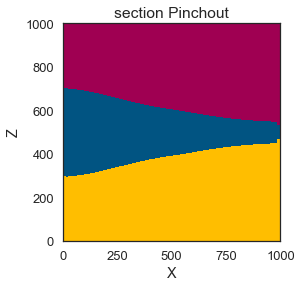

In [33]:
geo_model = create_example_model('Pinchout')